# Time series

Basic concepts:

| Term | Definition |
| - | - |
| Time series | Any data that are indexed by time. |
| Forecasting | Predicting the values for data points with the future time (i.e. time that hasn't been seen at training). |

Components of time series:
- **Trend**
  - Tendency of data to show long-term upward or downward movement of data
- **Seasonality**
  - Repetitive upward and downward movements from the trend that occurs within calendar year at fixed interval where periodicity is constant
  - Examples: festivals, customs within the societies
- **Cyclical**
  - Fluctuation around the trend line at random interval where periodicity is not constant 
  - Examples: macro-economic changes cause recession, unemployment, etc.
- **Irregular component**
  - White noise or random uncorrelated changes that follows normal distribution

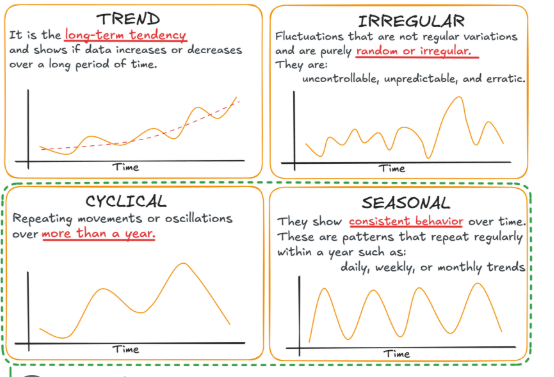

Time-series are generally of two types:
- **Additive time series**: 
  - Components (trend, seasonality, noise) are added to generate time series:
  - Time_series = trend + seasonality + noise
- **Multiplicative time series**: 
  - Components are multiplied to generate time series. One can notice an increase in the amplitude of seasonality in multiplicative time series
  - Time_series = trend * seasonality * noise

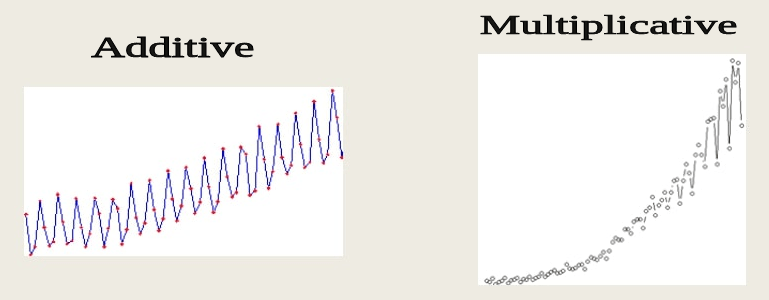


# Stationarity

Time series can be stationary and non-stationary.

Achieve stationarity: 
- Visual inspection to check
- Statistical tests: Augmented Dickey-Fuller (ADF) 
- Transformations: applying mathematical transformations like differencing (subtracting consecutive values) or log transformations to remove trends and stabilise variance.


## Stationary

Stationary time series are time series whose statistical properties (mean, variance, and autocorrelation) do not vary over time. 
- In simple terms, it looks the same regardless of when you observe it.
- A time series is stationary if it does not exhibit any long term trends or obvious seasonality. It has a constant variance and mean through time, and the statistical properties of the time series do not change. 
- Examples: 
  - White noise: a series where each value is a random number, independent of past values; 
  - Cyclic behaviour (if cycles are not fixed length): a series with repeating patterns, but the length of the cycles is not fixed 


## Non-stationary

**Non-stationary**
- Examples:
  - Time series with trends: a series where the mean is constantly increasing or decreasing over time
  - Time series with seasonality: a series with repeating patterns over fixed time intervals (e.g. sales data that spikes every December)

Below you can see an example of a time series that is not stationary, as it has **increasing trend** and it looks multiplicative (it's **variance is increasing**). 

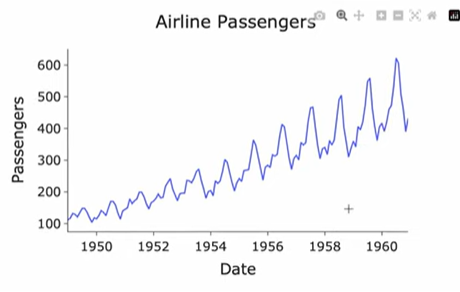


## Stationarity test

**Augmented Dickey-Fuller (ADF)**

Test whether a time series is seasonal or not.
- H0: the time series has a unit root, indicating it is non-stationary
- Ha: the time series is stationary
- p-value < 0.05 : reject the H0 -> this suggests that the time series is stationary. 
- p_value > 0.05 ; fail to reject the H0 -> the time series is non-stationary

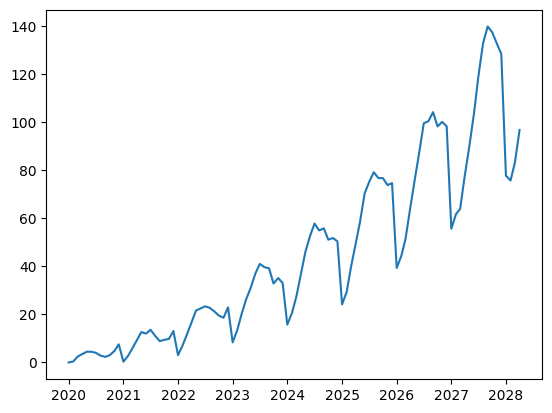

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create dummy data that has upward trend + seasonality
data = [i + (i%12)*2 + 10*np.sin(i/2) + np.random.randn()  for i in range(100)]
data = [i*(i-i*0.99) for i in data]
index = pd.date_range(start='2020-01-01', periods=100, freq='MS')
time_series = pd.Series(
    data, 
    index=index
)
# display(time_series)
plt.plot(time_series)



In [68]:
def adf_test(series):
    test_results = adfuller(series)
    print(f"ADF Statistic: {test_results[0]}")
    print(f"P-value: {test_results[1]}")
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print(f" > {thres}: {adf_stat}")

adf_test(time_series)


ADF Statistic: 6.027643723712469
P-value: 1.0
Critical Values:
 > 1%: -3.5078527246648834
 > 5%: -2.895382030636155
 > 10%: -2.584823877658872


# Transformations

2020-01-01      0.002752
2020-02-01      0.866133
2020-03-01      2.005706
2020-04-01      3.933311
2020-05-01      4.524155
                 ...    
2027-12-01    130.174586
2028-01-01     78.596155
2028-02-01     81.441671
2028-03-01     87.118176
2028-04-01     96.165273
Freq: MS, Length: 100, dtype: float64

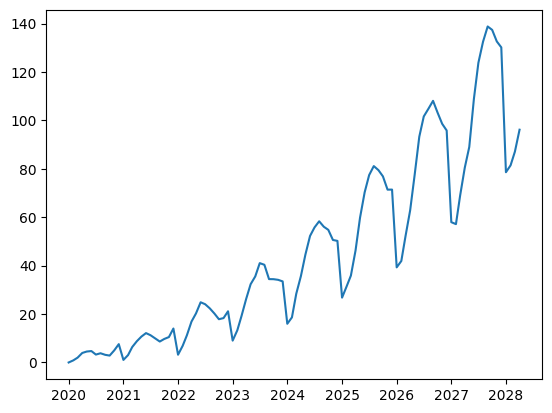

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create dummy data that has upward trend + seasonality
data = [i + (i%12)*2 + 10*np.sin(i/2) + np.random.randn()  for i in range(100)]
data = [i*(i-i*0.99) for i in data]
index = pd.date_range(start='2020-01-01', periods=100, freq='MS')
time_series = pd.Series(
    data, 
    index=index
)
display(time_series)
plt.plot(time_series)

This is not-stationary data

In [70]:
def adf_test(series):
    test_results = adfuller(series)
    print(f"ADF Statistic: {test_results[0]}")
    print(f"P-value: {test_results[1]}")
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print(f" > {thres}: {adf_stat}")

adf_test(time_series)

ADF Statistic: 6.027643723712469
P-value: 1.0
Critical Values:
 > 1%: -3.5078527246648834
 > 5%: -2.895382030636155
 > 10%: -2.584823877658872


**Differencing**
- $d(t)$ is the difference at time $t$ between the series at points $y(t)$ and $y(t-1)$.
- Removes trends

$$
d(t) = y(t) - y(t-1)
$$


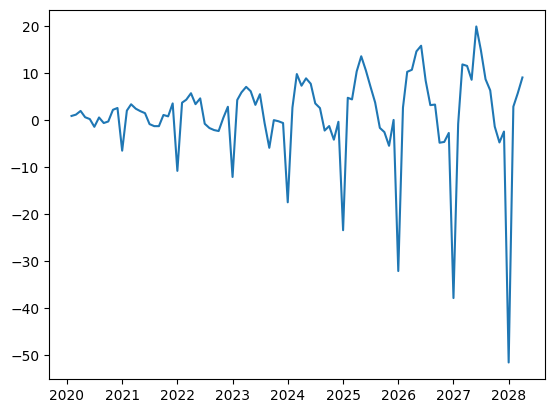

In [61]:
time_series1 = time_series.diff()
plt.plot(time_series1)

**Logarithm transform**
- Stabilises the variance


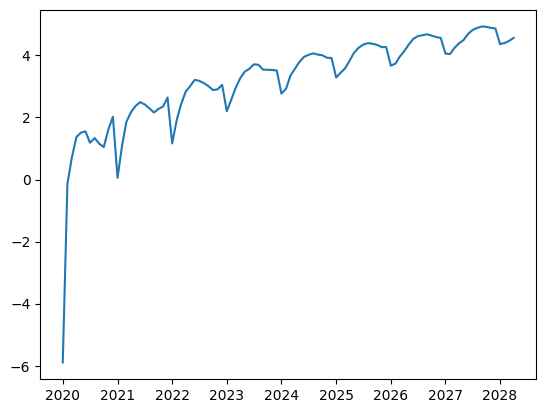

In [62]:
time_series2 = np.log(time_series)
plt.plot(time_series2)

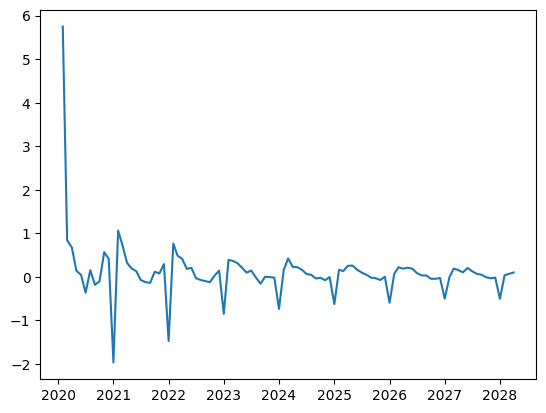

In [ ]:
# Now let's do logarithm and difference transform
# the data becomes (more or less) stationary
time_series3 = time_series2.diff()
plt.plot(time_series3)

In [74]:
adf_test(time_series3[~time_series3.isna()])

ADF Statistic: -3.26445561924463
P-value: 0.01654402261266142
Critical Values:
 > 1%: -3.5087828609430614
 > 5%: -2.895783561573195
 > 10%: -2.5850381719848565


# Models

Types of time series forecasting models.


## Statistical Models

- **Naive Methods**:
  - Forecast = last observed value (or seasonal equivalent)
- **Moving Average (MA)**
  - Forecast is the average of the last n observations
- **Exponential Smoothing**
  - Assigns exponentially decreasing weights to older observations, giving more weight to recent data
  - Includes:
    - **Simple Exponential Smoothing**: 
      - Just forecasts the level of the time series; 
      - Does NOT take into account trend or seasonality;
    - **Holt's Linear Trend Method**:
      - a.k.a. double exponential smoothing
      - Incorporates the trend as well as the level
    - **Holt-Winters Method**
      - a.k.a. triple exponential smoothing
      - Adds seasonality)
- **ARIMA (Autoregressive Integrated Moving Average)**
  - A versatile model that captures autoregressive, integrated, and moving average components of a time series.
  - Combines autoregression (AR), differencing (I), and moving average (MA).
  - Good for non-seasonal data.
- **SARIMA (Seasonal ARIMA)**
  - An extension of ARIMA that incorporates seasonal components
  - Can be used for seasonal data
- **SARIMAX (Seasonal ARIMA with Exogenous Regressors)**
  - Extends SARIMA, accounts for seasonality and external factors. Can accommodate both autoregressive and moving average components; 

## ML / DL models

- Linear regression
- Random Forest / Gradient Boosting
- Support Vector Regression

- RNNs
- LSTM
- GRU
- TCN
- Transformer-based models

## Hybrid models

Combine statistical and ML/DL models.

Examples:
- ARIMA + XGBoost
- LSTM + Prophet



## Specialised tools

**Specialised tools**

- Facebook's **Prophet**: designed for forecasting time series data with strong seasonality and trend components;
- **NeuralProphet**: combines Prophet with NNs;
- **GluonTS / Darts / Kats**: libraries for advanced time series modeling; 


# Some examples

## Example 1

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX

2020-01-01     0.917990
2020-02-01     7.692842
2020-03-01    13.962133
Freq: MS, dtype: float64
2028-02-01    90.434416
2028-03-01    92.742838
2028-04-01    97.843157
Freq: MS, dtype: float64


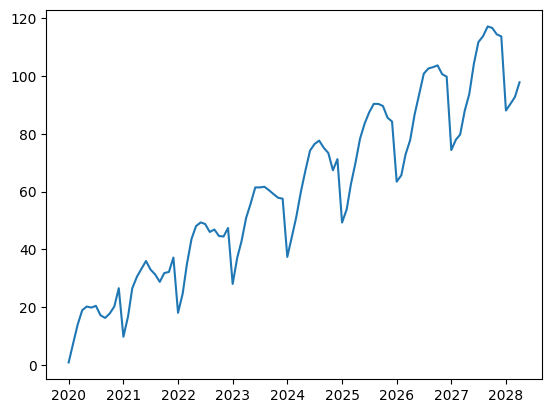

In [89]:
# Create dummy data that has upward trend + seasonality
data = [i + (i%12)*2 + 10*np.sin(i/2) + np.random.randn() for i in range(100)]
index = pd.date_range(start='2020-01-01', periods=100, freq='MS')
time_series = pd.Series(
    data, 
    index=index
)
print(time_series.head(3))
print(time_series.tail(3))
plt.plot(time_series)

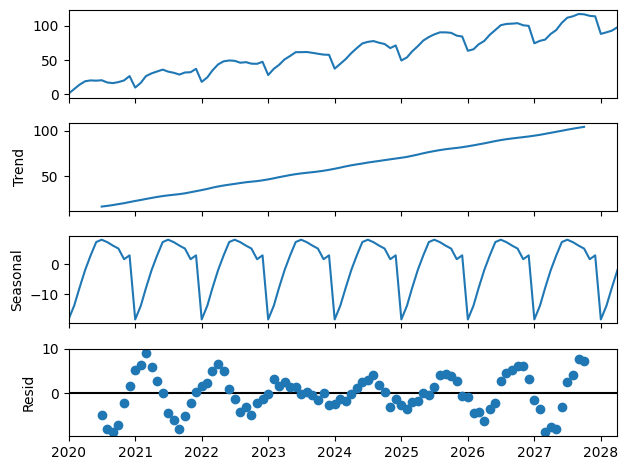

In [90]:
decomposition = seasonal_decompose(time_series, model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [91]:
# Test of Augmented Dickey Fuller:
print(f'T-test: {adfuller(time_series)[0]}')
p_value = adfuller(time_series)[1]
print(f'P-value: {p_value:.3f}')
if p_value < 0.05:
    print(f"> Reject the H0. Time series seems to be stationary.")
else:
    print(f"> Fail to reject the H0. Time series seems to be non-stationary.")

T-test: -0.26846714768815894
P-value: 0.930
> Fail to reject the H0. Time series seems to be non-stationary.


In [ ]:
# Let's separate the data into train and test
train = time_series.loc[
    time_series.index[0] : 
    time_series.index[int(len(time_series)*0.8)]
]

test = time_series.loc[
    time_series.index[int(len(time_series)*0.8)] :
] 

train_start = train.head(1).index[0].strftime("%Y-%m-%d")
train_end   = train.tail(1).index[0].strftime("%Y-%m-%d")
test_start  = test.head(1).index[0].strftime("%Y-%m-%d")
test_end    = test.tail(1).index[0].strftime("%Y-%m-%d")
print(f"Train: from {train_start} to {train_end}")
print(f"Test: from {test_start} to {test_end}")

Train: from 2020-01-01 to 2026-09-01
Test: from 2026-09-01 to 2028-04-01


c:\Users\evgen\.conda\envs\data-science-2\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


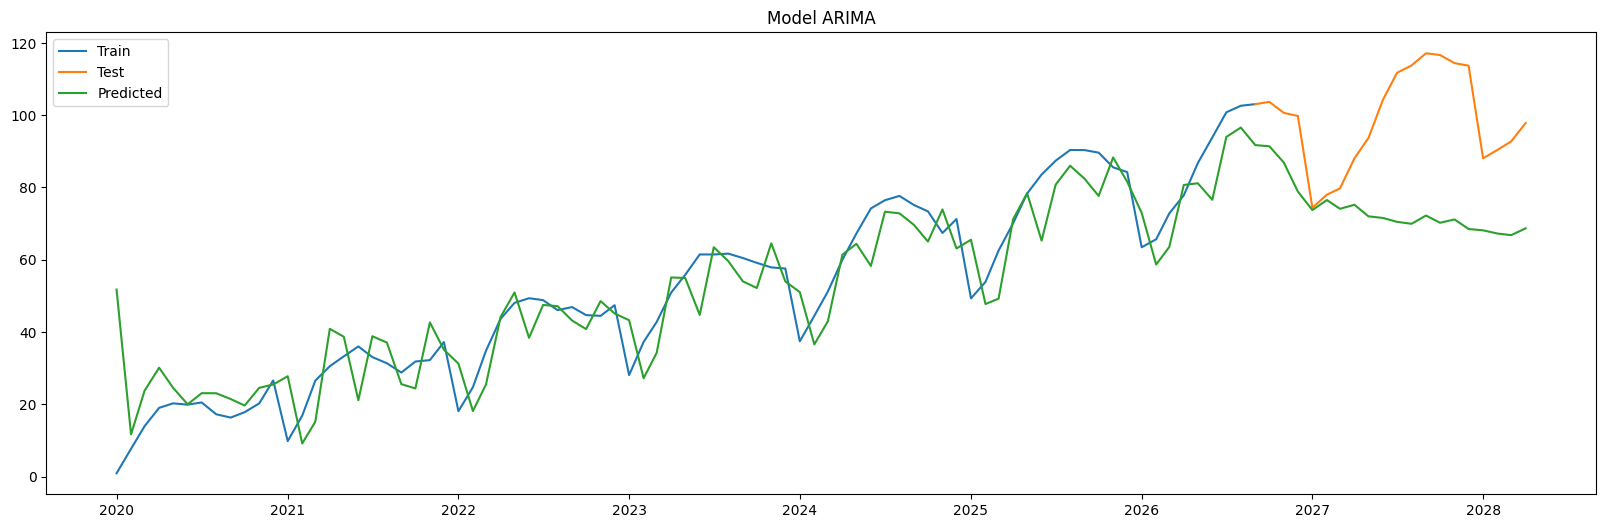

In [ ]:
# First, let's train ARIMA model
model_arima = ARIMA(train, 
                    order=(0, 0, 3),
                    seasonal_order=(1, 0, 1, 7)
).fit()

pred_model_arima = model_arima.predict(start=train_start, end=test_end)

plt.figure(figsize=(20, 6))
plt.plot(train)
plt.plot(test)
plt.plot(pred_model_arima)
plt.title('Model ARIMA')
plt.legend(['Train', 'Test', 'Predicted'])

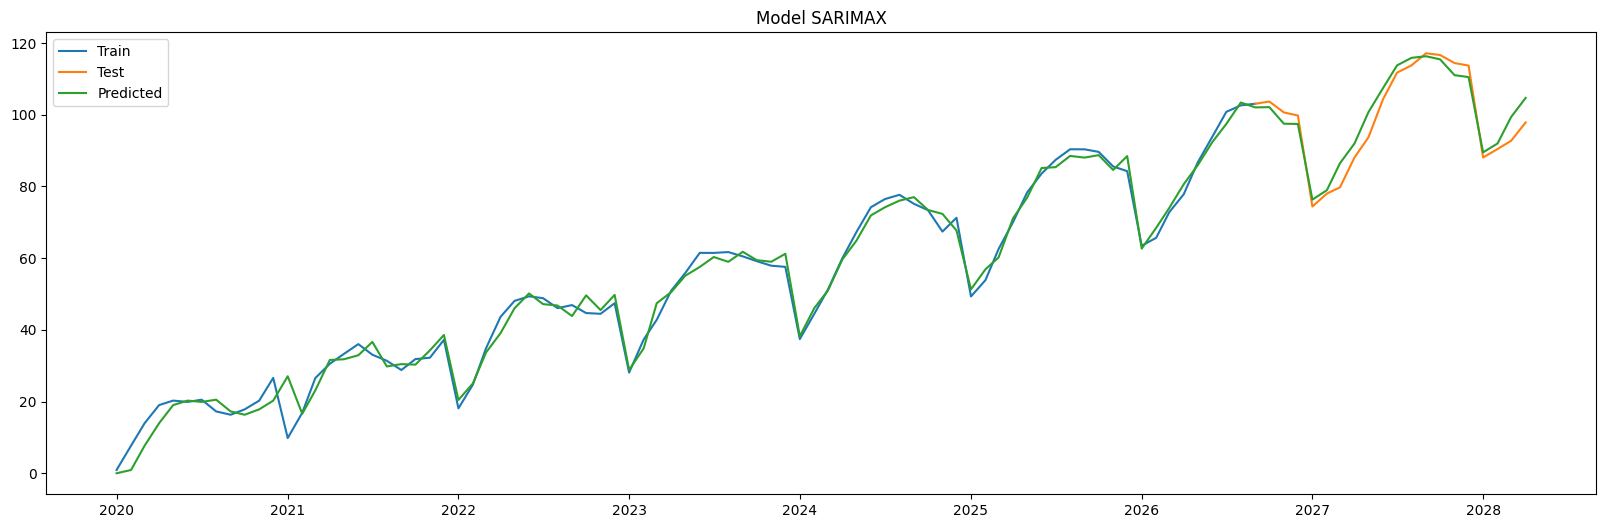

In [ ]:
# Now, let's train SARIMAX
model_sarimax = SARIMAX(train, 
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12)
).fit(disp=False)

pred_model_sarimax = model_sarimax.predict(start='2020-01-01', end='2028-04-01')

plt.figure(figsize=(20, 6))
plt.plot(train)
plt.plot(test)
plt.plot(pred_model_sarimax)
plt.title('Model SARIMAX')
plt.legend(['Train', 'Test', 'Predicted'])


## Example 2

Holt-Winters methods.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Create a sample time series with trend and seasonality
date_range = pd.date_range(start = '2020-01-01', periods = 48, freq = 'M')
data = 10 + 0.5 * np.arange(48) + 5 * np.sin(2 * np.pi * np.arange(48) / 12) + np.random.normal(0, 1, 48)
df = pd.DataFrame({
    'Date': date_range, 
    'Value': data
})
df.set_index('Date', inplace=True)
df['Type'] = 'Real'
df

C:\Users\Evgeni Zorin\AppData\Local\Temp\ipykernel_29768\874070761.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start = '2020-01-01', periods = 48, freq = 'M')


,Value,Type
Date,,
2020-01-31,10.003345,Real
2020-02-29,12.984252,Real
2020-03-31,16.494071,Real
2020-04-30,18.212886,Real
2020-05-31,17.272413,Real
2020-06-30,13.727654,Real
2020-07-31,13.523601,Real
2020-08-31,12.475205,Real
2020-09-30,12.039625,Real


<Axes: xlabel='Date', ylabel='Value'>

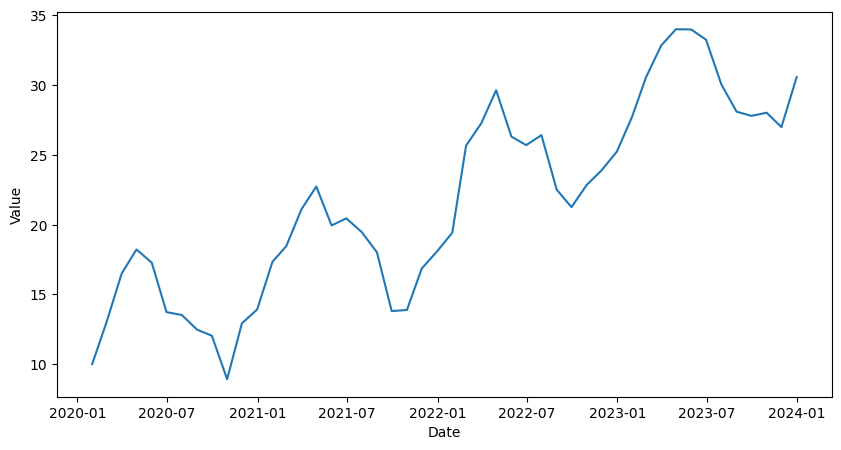

In [3]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x = df.index, 
    y = df['Value']
)

C:\Users\Evgeni Zorin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='None', ylabel='Value'>

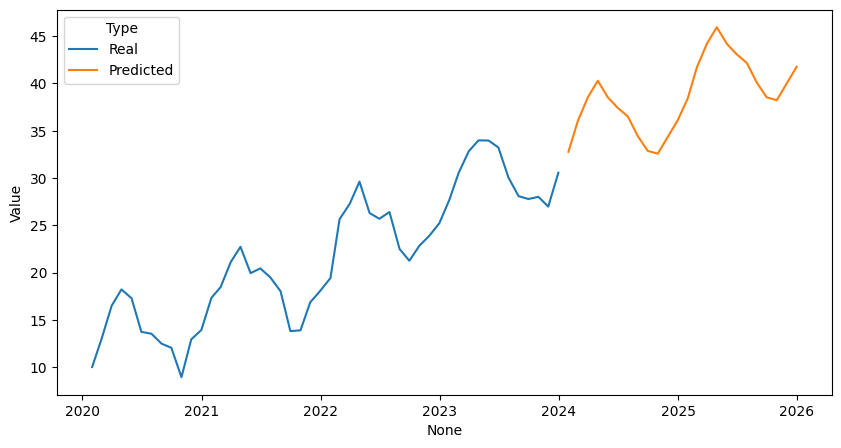

In [6]:
model = ExponentialSmoothing(
    df['Value'],
    trend = 'add',
    seasonal = 'add',
    seasonal_periods = 12
)
fit = model.fit()

# Forecast next 24 months
forecast = fit.forecast(24)
# Combine actual and forecast
forecast = forecast.to_frame(name = 'Value')
forecast['Type'] = 'Predicted'
combined = pd.concat(
    [df, forecast],
    axis = 'rows'
)
plt.figure(figsize=(10,5))
sns.lineplot(
    x = combined.index,
    y = combined['Value'],
    hue = combined['Type']
)
